# Group 6

## Randolph Zhao, Nathan Heller, Ergis Mecaj, and Nguyen Luu

# Abstract

In this project, we developed a regression model that uses the personal data of FIFA players, such as abilities and clubs, to predict their market values. 

We used the dataset on Kaggle (https://www.kaggle.com/karangadiya/fifa19) and implemented various preprocessing, including but not limited to filling missing values, transforming feature values, and dealing with highly correlated features. We compared several regression models with PCA and feature selection and we decided to use the Gradient Boosting regression model with 14 selected features. We then fine-tuned the hyperparameters and improved the performance of the model. All the performances were measured by cross-validation and mean square errors (MSE). To have a better understanding of the performance of the model, we measured the performance using the r2 score, which will be better if close to 1. In the final results, we achieved MSE mean = 4,399,891,465,323.725 with std = 984,225,798,043.3031, and r2 score mean = 0.8598939706399216 with std = 0.014417427062726796. 

Based on the R2 score, we believe our model performs well in the regression of values of FIFA players. With the model, we can have an approximation of the values of each player based on their personal data. 


## MileStone 1: Proposal

### Project Topic
We will use information about FIFA 19 players (e.g. current career info, abilities, personal info, age, etc) to build a supervised prediction model to predict their corresponding market values.
#### Problem Statement
We are curious about how personal information, ability in different positions and skills, and current career influences the market values of FIFA players. In addition, if we are given  information about new players, we wish to estimate their respective market values as well. 

In addition to predicting new players’ values given the existing patterns, it is also important for those players who wish to increase their market values. Our model could determine the most effective way to achieve this by highlighting the values that most closely correlate to higher market values. We also are curious as to whether there are any connections between current wages and market values.
#### Introduction/Insight
FIFA (Federation Internationale de Football Association) is an international non-profit organization that oversees organizations related to football, futsal, and beach soccer. FIFA oversees six international confederations of association football, with each confederation serving a different continental region of the world. Each national association within each international confederation is a direct member of FIFA. 

FIFA primarily concerns itself with ensuring that the laws of association football remain consistent across the professional world. FIFA also runs the World Cup, where all nations whose associations are members of FIFA participate in a global football tournament. As of 2021, 211 nations have associations that are members of FIFA. 

Based on our prior knowledge, there are some patterns between features and the market values. For example, players in large clubs, with better abilities, or with higher current wages usually result in higher market values. Different positions may have effects on market values. Height and weight may also have influences on market values. Players who are too young or too old may have lower market values as well. 
#### Dataset
We will use the FIFA 19 complete player dataset at https://www.kaggle.com/karangadiya/fifa19. 
The dataset consists of 89 features, varying from players’ performance to their physical statistics and even nationality. The large number of features give us the leverage during the feature selection phase because we have more freedom in choosing the best features that are suitable for our model.

The dataset size is pretty large with more than 18,000 samples, and most of them are complete with very few missing data. Looking at the features, we can see that there are strong correlations between wage and international reputation, age and overall, weight and acceleration, etc. 

In this dataset, the class variable we are trying to predict is the ‘Value’ column. This indicates the market value of a player, which is to say, how much their current team could sell their contract for, if they wished to do so. Value is often used as an estimator of how good a player is, but it is also heavily related to non-physical factors, like how much their current contract is for, or how long they have been playing.


## MileStone 2: EDA & Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Explaination about features:
- Id: Id of the record
- Name: Name of the player
- Age: Age of the player
- Photo: small pic of the player
- Nationality: of the player to which country he belongs
- flag: flag of the country, to whcihc the player belongs to
- Overall:- out of 100 point how much he scored
- Potential: score for career mode of the game, as for Career Mode Potential is important
- club: for which club, the player plays for
- club.logo : Logo fo the club
- value: price of the player in Euro in which the current club he plays
- wage: how much he have salary
- Special: It applies if a player has the Flair trait, which means high points means high flair trait and this mean he is special
- PreFerred.Foot: Rating of the player original foot
- International.Reputation: how much popular in real world
- weak.foot: rating of weak foot 
- skill.Moves :- Skill rating, which gives an indication of the level of skill moves they can perform
- Work.Rate(Attacking Rating/Defensive Rating) :- It defines how a player puts effort to participates in attacks and defenses even when they are out of position.
- Body.Type: what is his body type
- Real Face:- game uses real face
- Position: at which position he plays
- Jersey.Number: what is his jersey number
- Loaned.From: whether he is loaned from other club
- contract.Valid.until: till which year their contract is valid with current club
- Height: height in feet and inches
- weight: weight in pounds

Abilities:

LS Left Safety, ST Striker, RS Right Safety, LW Left wing, LF left forward, CF centre forward, RF right forward, RW right wing, LAM Left Attacking Midfield, CAM Center Attacking MidField  RAM Right Attacking MidField, LM Left MidField, LCM Left Centre MidField, CM Centre MidField, RCM Right Centre MidField, RM Right Midfield, LWB Left Wing Back, LDM Left Defensive Midfield, CDM Center Defensive Midfield, RDM Right Defensive Midfield, RWB Right Wing Back, LB Left Back, LCB Left Corner Back, CB Corner Back, RCB Right Corner Back, RB Right Back

Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes



We first sanitize the samples from features denoting monetary values and/or use numeric shorthand. We remove the euro symbols and convert suffixes denoting multiples of thousands into their non-notated forms (ie: 1K => 1,000, 1M => 1,000,000).

Since there are too many features/columns, we will not do EDA one by one. Instead, we mix the EDA and data cleaning so that we can see some important distributions, the reason to do data cleaning, or the results of the data cleaning.

In [3]:
df[['Value', 'Wage', 'Release Clause']]

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
...,...,...,...
18202,€60K,€1K,€143K
18203,€60K,€1K,€113K
18204,€60K,€1K,€165K
18205,€60K,€1K,€143K


In [4]:
def value_and_wage_conversion(Value):
    if isinstance(Value, str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)


df['Value'] = df['Value'].apply(lambda x: value_and_wage_conversion(x))
df['Wage'] = df['Wage'].apply(lambda x: value_and_wage_conversion(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: value_and_wage_conversion(x))

features = df.drop(columns=['Value'])
y = df['Value']

We can see the distribution of the values has a log distribution.

<AxesSubplot:>

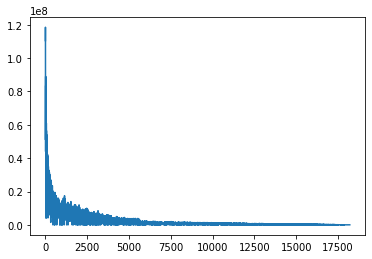

In [5]:
y.plot()

In [6]:
features.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

We then remove features that are non-essential for our specific modelling purposes and seperate month/year from joined.

In [7]:
features['Joined_month'] = features['Joined'].str[:3]
features['Joined_year'] = features['Joined'].str[-4:].astype(float)

features = features.drop(columns=['Unnamed: 0', 'ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Joined'])

We fill in empty samples under the Club and Position features with placeholders.

In [8]:
features['Club'].fillna('No Club', inplace = True)
features['Position'].fillna('Unknown', inplace=True)

We properly sanitize the Height samples to translate imperial notations for heights (eg: 6'4'') into total inches.

In [9]:
features['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [10]:
def clean_height(x):
    if isinstance(x,str):
        l = x.split("'")
        return (int(l[0])*12 + int(l[1])) / 12
    return np.nan


features['Height'] = features['Height'].apply(clean_height)
features['Height'].fillna((features['Height'].mean()), inplace = True)

We also properly sanitize the Weight samples to remove the suffix denoting these numbers as pounds.

In [11]:
features['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [12]:
def clean_weight(x):
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

features['Weight'] = features['Weight'].apply(clean_weight).astype('float')

We map irregular categories into the already established body type lexicon for the Body Type feature.

In [13]:
features['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Courtois                   1
Messi                      1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Neymar                     1
Shaqiri                    1
C. Ronaldo                 1
Name: Body Type, dtype: int64

In [14]:
body_dict = {'Messi': 'Lean', 'C. Ronaldo': 'Normal', 'Neymar': 'Lean', 'Courtois': 'Lean', 
       'PLAYER_BODY_TYPE_25': 'Normal', 'Shaqiri': 'Stocky', 'Akinfenwa': 'Stocky', 'Normal': 'Normal', 'Lean': 'Lean'}

features['Body Type'] = features['Body Type'].map(body_dict)

Stocky is very rare but it very important so we keep it there.

<AxesSubplot:>

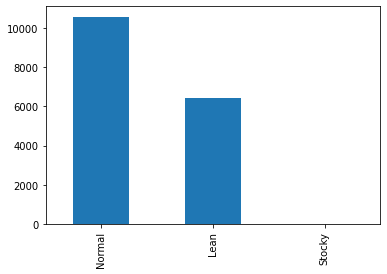

In [15]:
features['Body Type'].value_counts().plot.bar()

We introduce a Major Nation feature that translates data from the Nationality feature.

In [16]:
features["Nationality"].value_counts()

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Guam              1
Puerto Rico       1
Grenada           1
Oman              1
Ethiopia          1
Name: Nationality, Length: 164, dtype: int64

In [17]:
nat_counts = features["Nationality"].value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

def major_nation(df):
    if (df["Nationality"] in nat_list):
        return 1
    else:
        return 0
    
features['Major_Nation'] = features.apply(major_nation, axis = 1)

In our calculation, there will be more major nations than smaller nations and this is reasonable because FIFA didn't record all players, especially players in the smaller nations.

<AxesSubplot:>

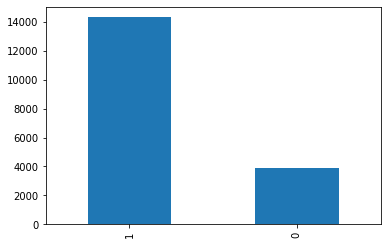

In [18]:
features['Major_Nation'].value_counts().plot.bar()

We add a Simple Position feature that translates data from the Position feature, which will simply more nuanced football positions into the more universally simpler ones.

In [19]:
features['Position'].value_counts()

ST         2152
GK         2025
CB         1778
CM         1394
LB         1322
RB         1291
RM         1124
LM         1095
CAM         958
CDM         948
RCB         662
LCB         648
LCM         395
RCM         391
LW          381
RW          370
RDM         248
LDM         243
LS          207
RS          203
RWB          87
LWB          78
CF           74
Unknown      60
RAM          21
LAM          21
RF           16
LF           15
Name: Position, dtype: int64

In [20]:
position_dict = {'GK': 'GK', 
                 'RB': 'DF', 'LB': 'DF', 'CB': 'DF', 'LCB': 'DF', 'RCB': 'DF', 'RWB': 'DF', 'LWB': 'DF',
                 'LDM': 'DM', 'CDM': 'DM', 'RDM': 'DM',
                 'LM': 'MF', 'LCM': 'MF', 'CM': 'MF', 'RCM': 'MF', 'RM': 'MF',
                 'LAM': 'AM', 'CAM': 'AM', 'RAM': 'AM', 'LW': 'AM', 'RW': 'AM',
                 'RS': 'ST', 'ST': 'ST', 'LS': 'ST', 'CF': 'ST', 'LF': 'ST', 'RF': 'ST'}
    
features['Simple_Position'] = features['Position'].map(position_dict)

<AxesSubplot:>

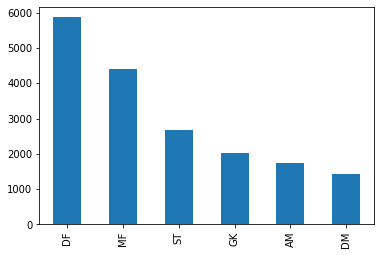

In [21]:
features['Simple_Position'].value_counts().plot.bar()

Since the Work Rate feature has two subcategories within the feature for each sample, we create two new features that inherit each individual subcategory.

In [22]:
features["Work Rate"]

0        Medium/ Medium
1             High/ Low
2          High/ Medium
3        Medium/ Medium
4            High/ High
              ...      
18202    Medium/ Medium
18203    Medium/ Medium
18204    Medium/ Medium
18205    Medium/ Medium
18206    Medium/ Medium
Name: Work Rate, Length: 18207, dtype: object

In [23]:
tempwork = features["Work Rate"].str.split("/ ", n = 1, expand = True) 
features["WorkRate1"] = tempwork[0]  
features["WorkRate2"] = tempwork[1]

We remove the now obsolete features from which we have just derived these new features.

In [24]:
features.drop(['Nationality','Work Rate','Position'],axis=1,inplace=True)

Columns 16-42 are stored as strings, with an average and a +variance. We simply trim the +variance so we can visualize these numbers.

In [25]:
features[list(features.columns)[16:42]]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2
18203,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
18204,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2
18205,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2


In [26]:
for col in list(features.columns)[16:42]:
    features[col] = features[col].str.split('+').str[0].astype('float')

'Preferred Foot' can only take two values and thus can easily become a boolean.

In [27]:
features['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [28]:
features['Preferred Foot'] = features['Preferred Foot'].apply(lambda x: 0 if x == 'Left' else 1)

The preferred foot is not balanced but it is reasonable.

<AxesSubplot:>

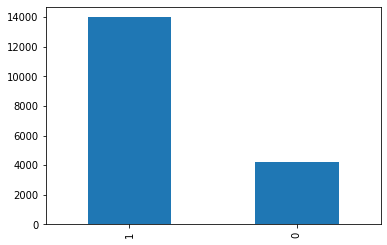

In [29]:
features['Preferred Foot'].value_counts().plot.bar()

Special is a trait only important to actual FIFA gameplay, and thus isn't important to what we do. Join month and Jersey number are not useful to us either.

In [30]:
features = features.drop(columns=['Special', 'Joined_month', 'Jersey Number', 'Loaned From', 'Contract Valid Until'])

What club a player is in will be simply converted to 'Large Club' or 'Small Club' based on the number of players in the list who are in each club.

In [31]:
features["Club"].value_counts()

No Club                    241
Wolverhampton Wanderers     33
Valencia CF                 33
Atlético Madrid             33
Southampton                 33
                          ... 
Fluminense                  20
Santos                      20
Sligo Rovers                19
Limerick FC                 19
Derry City                  18
Name: Club, Length: 652, dtype: int64

In [32]:
club_counts = features["Club"].value_counts()
club_list = club_counts[club_counts > 28].index.tolist()
features['Large_Club'] = features['Club'].apply(lambda x: 1 if x in club_list else 0)
features = features.drop(columns=['Club'])

large clubs are rare in FIFA and it is very reasonable in the real world.

<AxesSubplot:>

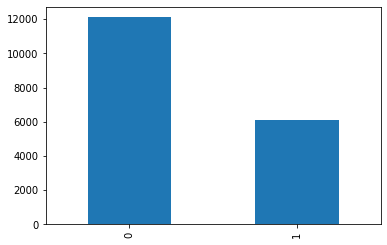

In [33]:
features['Large_Club'].value_counts().plot.bar()

In [34]:
features['WorkRate1'] = features['WorkRate1'].fillna('Medium')
features['WorkRate2'] = features['WorkRate2'].fillna('Medium')
features['Simple_Position'] = features['Simple_Position'].fillna('Unknown')
features['Body Type'] = features['Body Type'].fillna('Unknown')

We have a lot of data and we tried our best to solve missing values with some meaningful values. For the rest, we just fill with mean and drop the rest.

In [35]:
features = features.fillna(features.mean())
features

,Age,Overall,Potential,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_year,Major_Nation,Simple_Position,WorkRate1,WorkRate2,Large_Club
0,31,94,94,565000.0,0,5.0,4.0,4.0,Lean,5.583333,159.0,88.00000,88.00000,88.00000,92.00000,93.00000,93.00000,93.00000,92.00000,93.000000,93.000000,93.000000,91.00000,84.000000,84.000000,84.000000,91.00000,64.000000,61.000000,61.000000,61.000000,64.000000,59.000000,47.000000,47.000000,47.000000,59.000000,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2004.0,1,ST,Medium,Medium,1
1,33,94,94,405000.0,1,5.0,4.0,5.0,Normal,6.166667,183.0,91.00000,91.00000,91.00000,89.00000,90.00000,90.00000,90.00000,89.00000,88.000000,88.000000,88.000000,88.00000,81.000000,81.000000,81.000000,88.00000,65.000000,61.000000,61.000000,61.000000,65.000000,61.000000,53.000000,53.000000,53.000000,61.000000,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2018.0,1,ST,High,Low,0
2,26,92,93,290000.0,1,5.0,5.0,5.0,Lean,5.750000,150.0,84.00000,84.00000,84.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.000000,89.000000,89.000000,88.00000,81.000000,81.000000,81.000000,88.00000,65.000000,60.000000,60.000000,60.000000,65.000000,60.000000,47.000000,47.000000,47.000000,60.000000,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2017.0,1,AM,High,Medium,1
3,27,91,93,260000.0,1,4.0,3.0,1.0,Lean,6.333333,168.0,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2011.0,1,GK,Medium,Medium,1
4,27,91,92,355000.0,1,4.0,5.0,4.0,Normal,5.916667,154.0,82.00000,82.00000,82.00000,87.00000,87.00000,87.00000,87.00000,87.00000,88.000000,88.000000,88.000000,88.00000,87.000000,87.000000,87.000000,88.00000,77.000000,77.000000,77.000000,77.000000,77.000000,73.000000,66.000000,66.000000,66.000000,73.000000,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2015.0,1,MF,High,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1000.0,1,1.0,2.0,2.0,Lean,5.750000,134.0,42.00000,42.00000,42.00000,44.00000,44.00000,44.00000,44.00000,44.00000,45.000000,45.000000,45.000000,44.00000,45.000000,45.000000,45.000000,44.00000,44.000000,45.000000,45.000000,45.000000,44.000000,45.000000,45.000000,45.000000,45.000000,45.000000,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,1430

The dataset now has no missing values.

In [36]:
features.isnull().sum()

Age                0
Overall            0
Potential          0
Wage               0
Preferred Foot     0
                  ..
Major_Nation       0
Simple_Position    0
WorkRate1          0
WorkRate2          0
Large_Club         0
Length: 78, dtype: int64

In [37]:
features.isnull().sum().sum()

0

<AxesSubplot:>

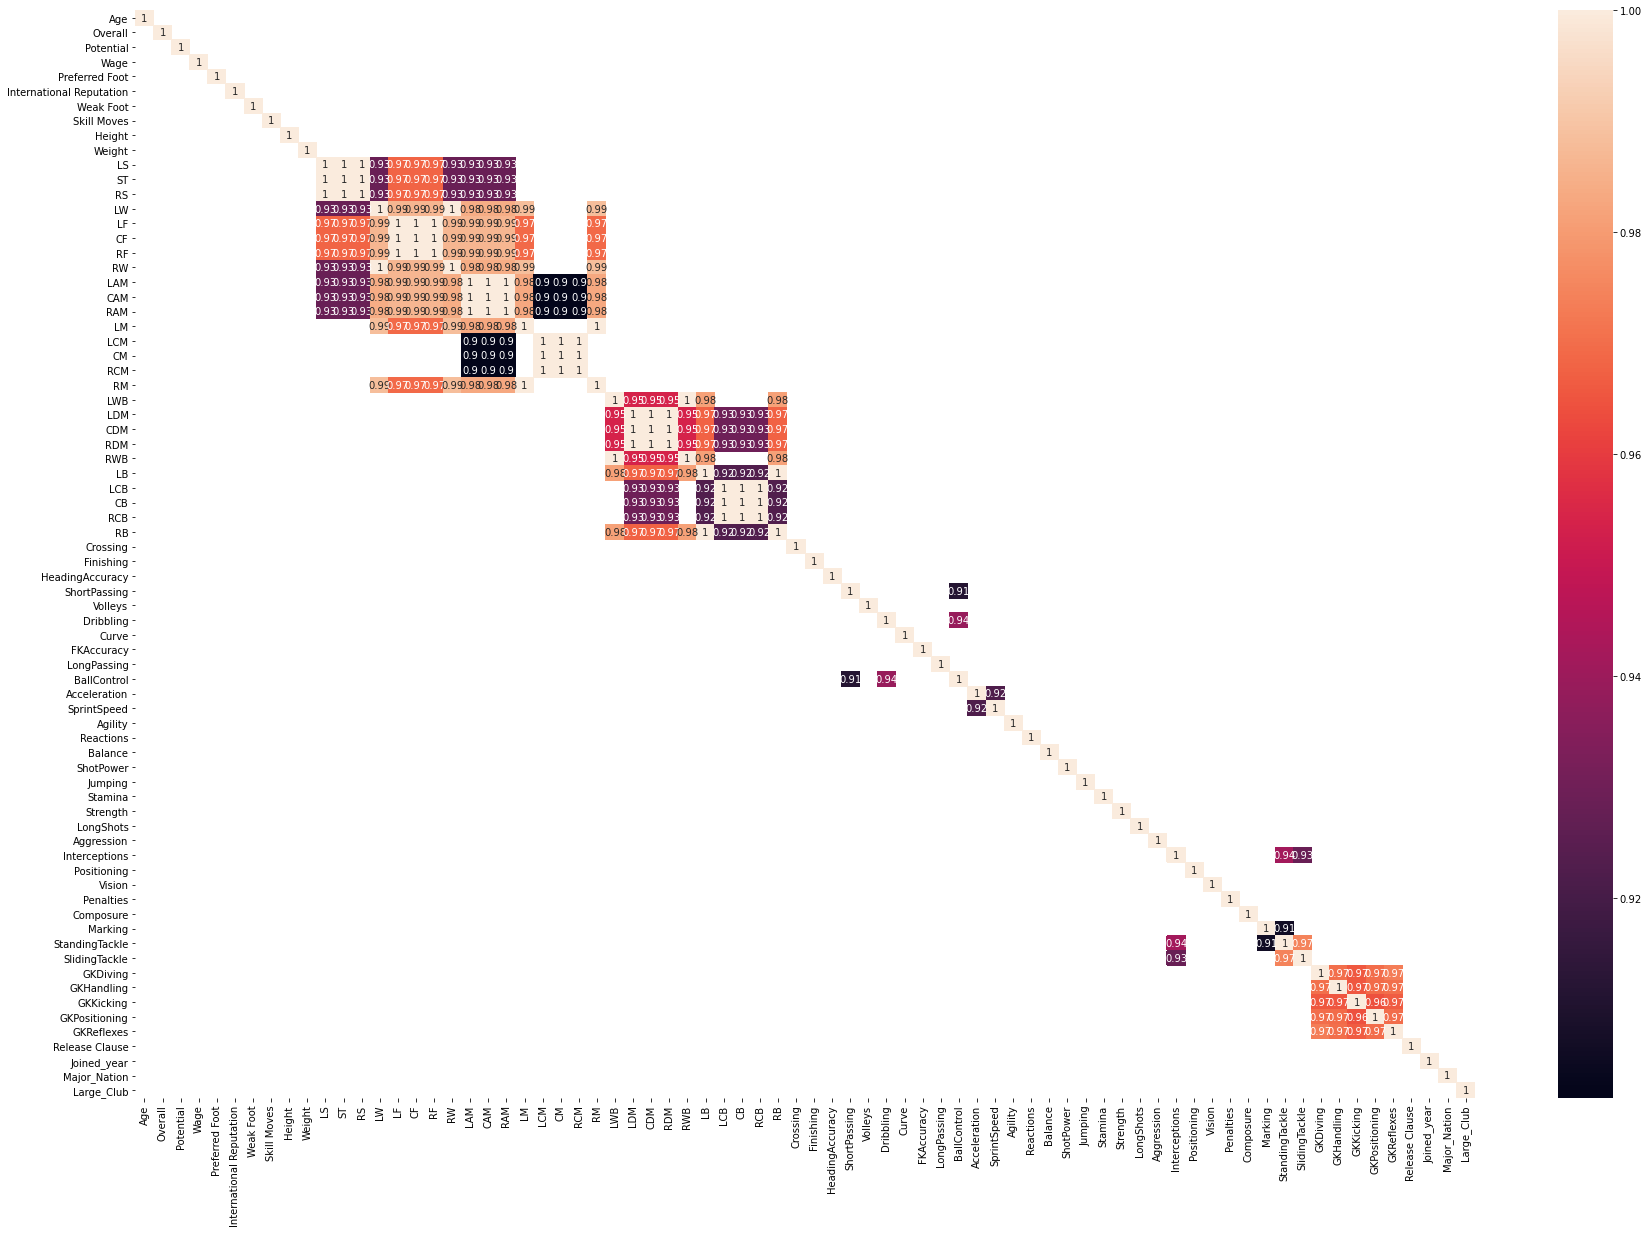

In [38]:
plt.figure(figsize=(30, 20))
corr = features.corr()
high_corr = corr[abs(corr)>=.9]

sns.heatmap(high_corr, annot=True)

We first are going to deal with the large clump of high correlations in the bottom right. These are goalkeeping stats, and only goalkeepers have high values in these, leading to high correlation between them. Goalkeeper value is still important, so we will combine all these stats into a summed "Goalkeeping Score" overall.

In [39]:
features['GK_values'] = features['GKDiving'] + features['GKHandling'] + features['GKKicking'] + features['GKPositioning'] + features['GKReflexes']
features.drop(['GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1,inplace=True)

Next, we have to deal with all the values that indicate how good a player is at a certain position. First, we will try making a 'Left', 'Center', and 'Right' feature, so that we can condense left, right, and center values of the other positions.

In [40]:
features['Left'] = features['LS'] + features['LW'] + features['LF'] + features['LAM'] + features['LM'] + features['LCM'] + features['LWB'] + features['LDM'] + features['LB'] + features['LCB']
features['Centre'] = features['ST'] + features['CF'] + features['CAM'] + features['LCM'] + features['CM'] + features['RCM'] + features['CDM'] + features['LCB'] + features['CB'] + features['RCB']
features['Right'] = features['RS'] + features['RF'] + features['RW'] + features['RAM'] + features['RCM'] + features['RM'] + features['RDM'] + features['RWB'] + features['RCB'] + features['RB']

features['striker'] = features['LS'] + features['ST'] + features['RS']
features['wing'] = features['LW'] + features['RW']
features['forward'] = features['LF'] + features['CF'] + features['RF']
features['Attacking Midfield'] = features['LAM'] + features['CAM'] + features['RAM']
features['MidField'] = features['LM'] + features['LCM'] + features['CM'] + features['RCM'] + features['RM']
features['Defensive Midfield'] = features['LDM'] + features['CDM'] + features['RDM']
features['Back'] = features['LB'] + features['LCB'] + features['CB'] + features['RCB'] + features['RB']
features['Wing Back'] = features['LWB'] + features['RWB']

In [41]:
features = features.drop(columns=list(features.columns)[13:39])

features

,Age,Overall,Potential,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Height,Weight,LS,ST,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Joined_year,Major_Nation,Simple_Position,WorkRate1,WorkRate2,Large_Club,GK_values,Left,Centre,Right,striker,wing,forward,Attacking Midfield,MidField,Defensive Midfield,Back,Wing Back
0,31,94,94,565000.0,0,5.0,4.0,4.0,Lean,5.583333,159.0,88.00000,88.00000,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,2004.0,1,ST,Medium,Medium,1,54.0,772.000000,728.000000,772.000000,264.000000,184.000000,279.000000,279.000000,434.000000,183.000000,259.000000,128.000000
1,33,94,94,405000.0,1,5.0,4.0,5.0,Normal,6.166667,183.0,91.00000,91.00000,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,2018.0,1,ST,High,Low,0,58.0,767.000000,732.000000,767.000000,273.000000,178.000000,270.000000,264.000000,419.000000,183.000000,281.000000,130.000000
2,26,92,93,290000.0,1,5.0,5.0,5.0,Lean,5.750000,150.0,84.00000,84.00000,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,2017.0,1,AM,High,Medium,1,59.0,752.000000,706.000000,752.000000,252.000000,178.000000,267.000000,267.000000,419.000000,180.000000,261.000000,130.000000
3,27,91,93,260000.0,1,4.0,3.0,1.0,Lean,6.333333,168.0,57.81547,57.81547,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,138600000.0,2011.0,1,GK,Medium,Medium,1,444.0,579.271058,573.849646,579.271058,173.446409,118.075301,176.158169,176.949386,294.132056,170.475437,280.457449,115.026548
4,27,91,92,355000.0,1,4.0,5.0,4.0,Normal,5.916667,154.0,82.00000,82.00000,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,2015.0,1,MF,High,High,1,56.0,812.000000,793.000000,812.000000,246.000000,174.000000,261.000000,264.000000,437.000000,231.000000,344.000000,154.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1000.0,1,1.0,2.0,2.0,Lean,5.750000,134.0,42.00000,42.00000,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,143000.0,2017.0,1,MF,Medium,Medium,0,47.0,443.000000,446.000000,443.000000,126.000000,88.000000,132.000000,135.000000,223.000000,135.000000,225.000000,88.000000
18203,19,47,63,1000.0,1,1.0,2.0,2.0,Normal,6.250000,170.0,45.00000,45.00000,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,113000.0,2018.0,1,ST,Medium,Medium,0,45.0,361.000000,359.000000,361.000000,135.000000,78.000000,126.000000,120.000000,181.000000,93.000000,154.000000,60.000000
18204,16,47,67,1000.0,1,1.0,3.0,2.0,Normal,5.666667,148.0,45.00000,45.00000,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,165000.0,2017.0,1,ST,Medium,Medium,0,40.0,387.000000,363.000000,387.000000,135.000000,90.000000,138.000000,132.000000,202.000000,90.000000,150.000000,68.000000
18205,17,47,66,1000.0,1,1.0,3.0,2.0,Lean,5.833333,154.0,47.00000,47.00000,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50

<AxesSubplot:>

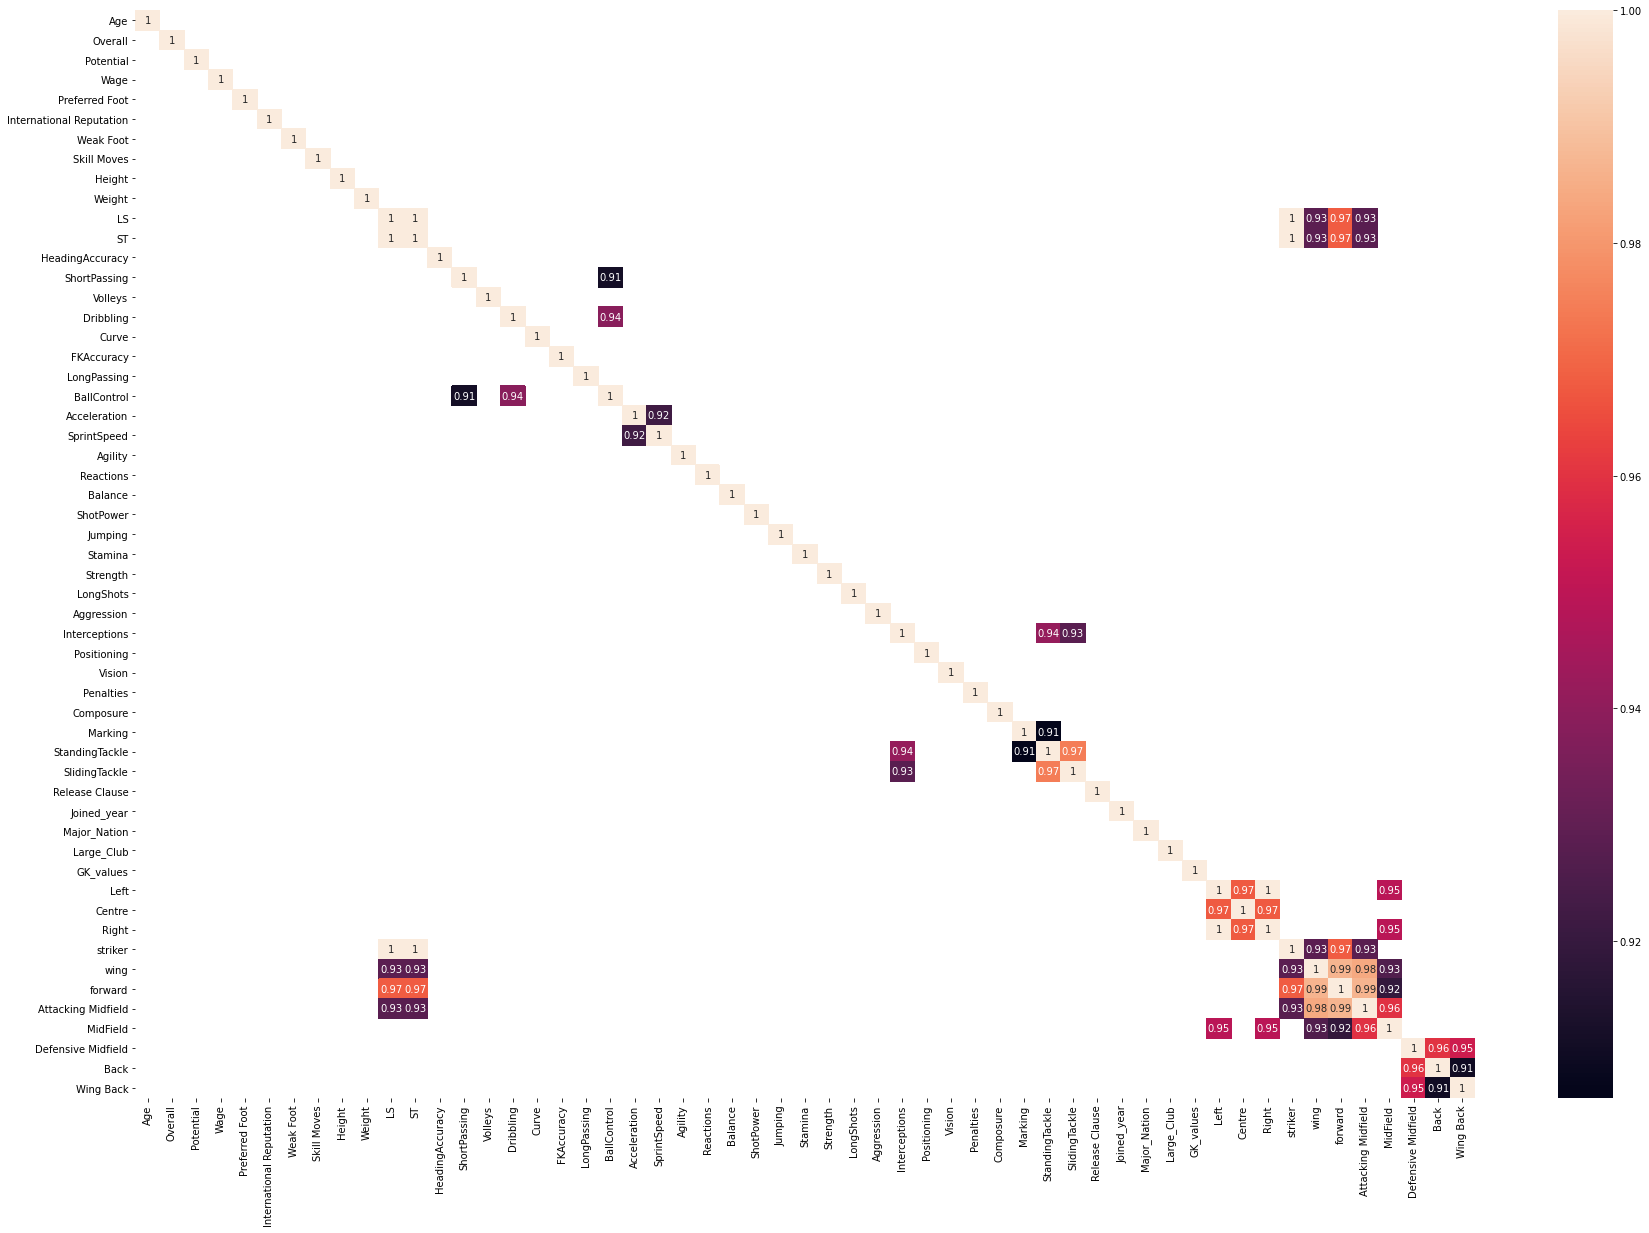

In [42]:
plt.figure(figsize=(30, 20))
corr = features.corr()
high_corr = corr[abs(corr)>=.9]

sns.heatmap(high_corr, annot=True)

This didn't end up mattering, as there was so little changed between a player playing a left position and a right position, that we decided that we could safely remove all three Left, right, and center variables.

In [43]:
features = features.drop(columns=['Left', 'Right', 'Centre'])

In addition, the vast majority of players were equally as good at playing wing, forward, and striker that we could drop two of them. Attacking midfield, defensive midfield, and midfield all had basically the same results as well, so we kept midfield of the three.

In [44]:
features = features.drop(columns=['wing'])

In [45]:
features = features.drop(columns=['Attacking Midfield', 'Defensive Midfield'])

In [46]:
features = features.drop(columns=['forward'])

Standing tackles and sliding tackles were highly correlated, so we combined them into a "Tackle" feature and removed the originals.

In [47]:
features['Tackle'] = features['StandingTackle'] + features['SlidingTackle']
features = features.drop(columns=['StandingTackle', 'SlidingTackle'])

<AxesSubplot:>

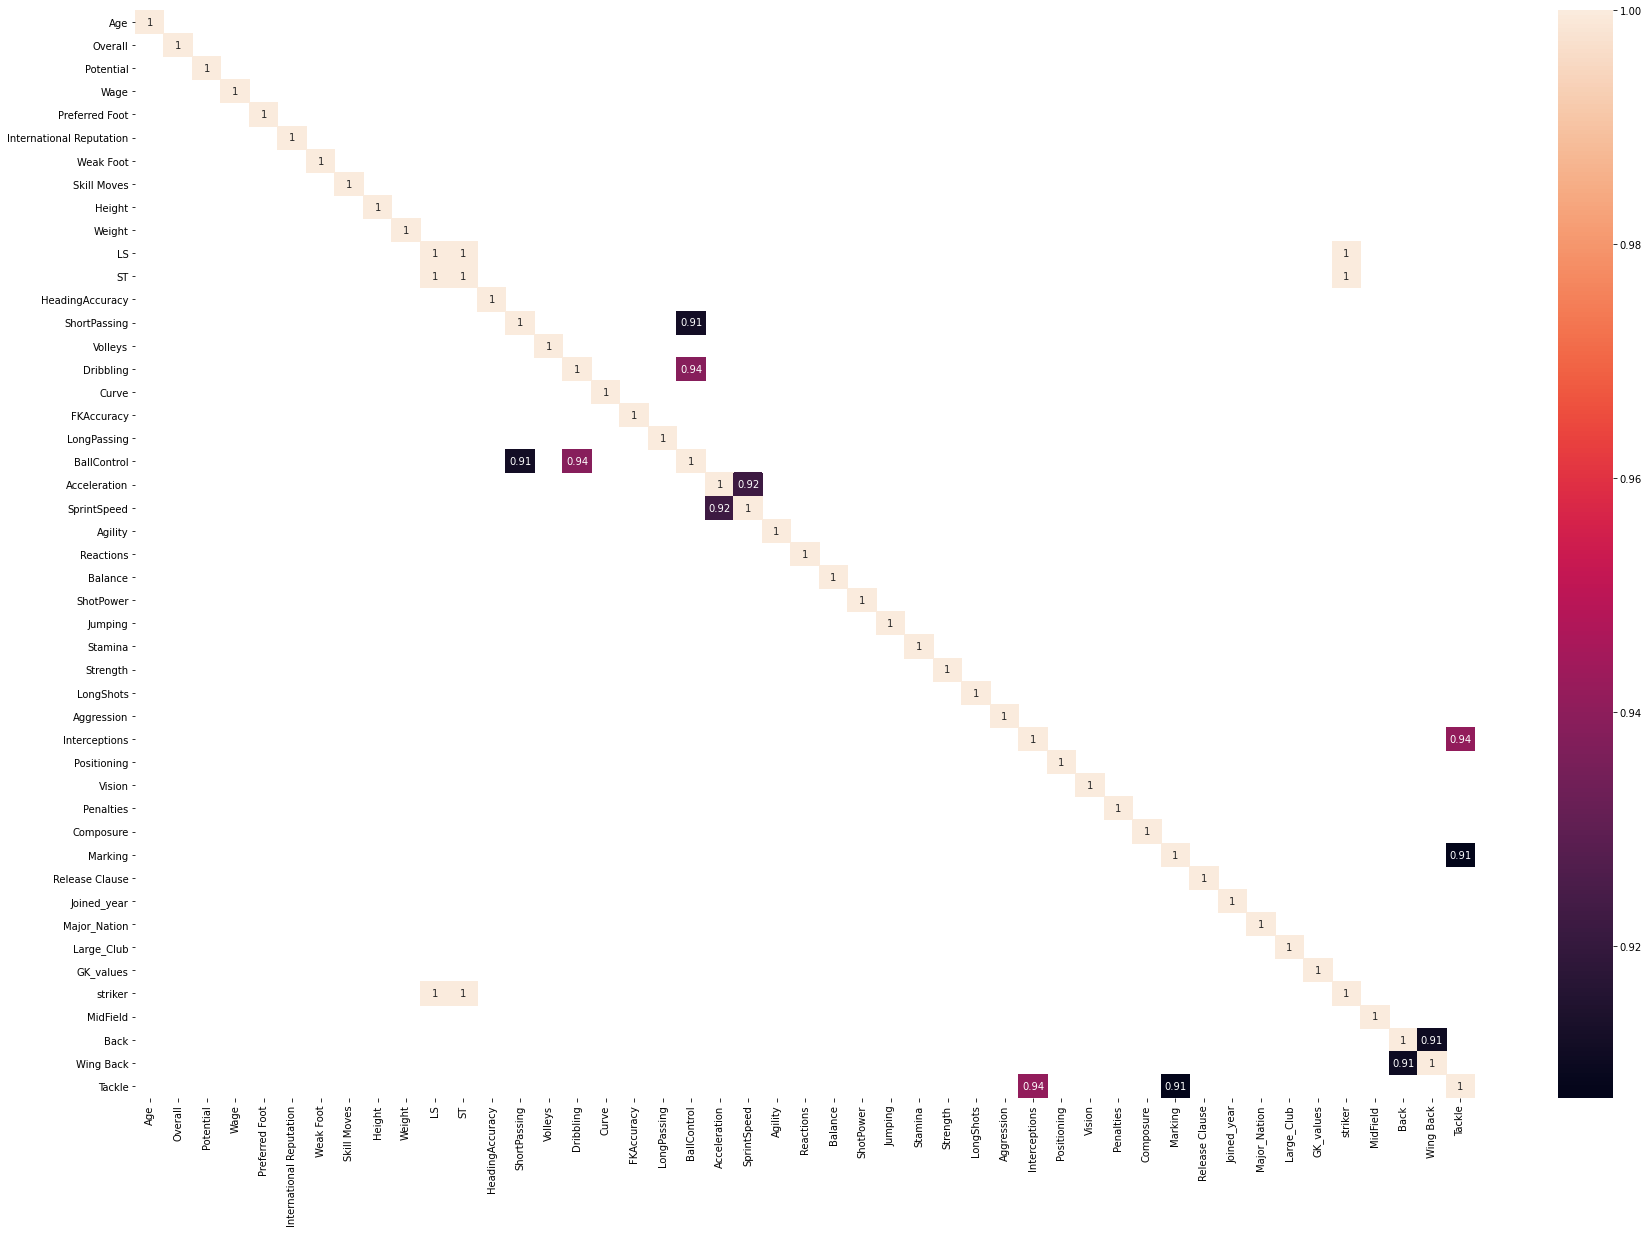

In [48]:
plt.figure(figsize=(30, 20))
corr = features.corr()
high_corr = corr[abs(corr)>=.9]

sns.heatmap(high_corr, annot=True)

there are still a couple decently highly correlated values, but we figure we can leave those for preliminary training, as they are not as high as the others, and if we remove too much we risk losing important concepts from the data.

In [49]:
features

,Age,Overall,Potential,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Height,Weight,LS,ST,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Release Clause,Joined_year,Major_Nation,Simple_Position,WorkRate1,WorkRate2,Large_Club,GK_values,striker,MidField,Back,Wing Back,Tackle
0,31,94,94,565000.0,0,5.0,4.0,4.0,Lean,5.583333,159.0,88.00000,88.00000,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,226500000.0,2004.0,1,ST,Medium,Medium,1,54.0,264.000000,434.000000,259.000000,128.000000,54.0
1,33,94,94,405000.0,1,5.0,4.0,5.0,Normal,6.166667,183.0,91.00000,91.00000,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,127100000.0,2018.0,1,ST,High,Low,0,58.0,273.000000,419.000000,281.000000,130.000000,54.0
2,26,92,93,290000.0,1,5.0,5.0,5.0,Lean,5.750000,150.0,84.00000,84.00000,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,228100000.0,2017.0,1,AM,High,Medium,1,59.0,252.000000,419.000000,261.000000,130.000000,57.0
3,27,91,93,260000.0,1,4.0,3.0,1.0,Lean,6.333333,168.0,57.81547,57.81547,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,138600000.0,2011.0,1,GK,Medium,Medium,1,444.0,173.446409,294.132056,280.457449,115.026548,34.0
4,27,91,92,355000.0,1,4.0,5.0,4.0,Normal,5.916667,154.0,82.00000,82.00000,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,196400000.0,2015.0,1,MF,High,High,1,56.0,246.000000,437.000000,344.000000,154.000000,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1000.0,1,1.0,2.0,2.0,Lean,5.750000,134.0,42.00000,42.00000,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,143000.0,2017.0,1,MF,Medium,Medium,0,47.0,126.000000,223.000000,225.000000,88.000000,95.0
18203,19,47,63,1000.0,1,1.0,2.0,2.0,Normal,6.250000,170.0,45.00000,45.00000,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,113000.0,2018.0,1,ST,Medium,Medium,0,45.0,135.000000,181.000000,154.000000,60.000000,34.0
18204,16,47,67,1000.0,1,1.0,3.0,2.0,Normal,5.666667,148.0,45.00000,45.00000,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,165000.0,2017.0,1,ST,Medium,Medium,0,40.0,135.000000,202.000000,150.000000,68.000000,24.0
18205,17,47,66,1000.0,1,1.0,3.0,2.0,Lean,5.833333,154.0,47.00000,47.00000,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,143000.0,2018.0,1,AM,Medium,Medium,0,51.0,141.000000,209.000000,163.000000,72.000000,52.0


In [50]:
X = pd.get_dummies(features)

In [51]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X))

It is a regression task.

The reason we chose these five models (SVR, Gradient Boosting, Elastic Net, Lasso, KNeighborsRegressor, and linear regression) is for several reasons. 

First, our data has many features, which SVR deals well with, so we wanted at least one model that dealt well with a lot of features. 

Elastic Net is a useful model for our data because we have many highly correlated variables (multicollinearity problem). In fact, we may rerun elastic net later without being so harsh about feature dropping to see if it impacts out performance. 

For similar reason, we select Lasso as well.

We chose gradient boosting because our other two models were linear, and it will be useful to see the difference in performance between linear and non linear models, to help inform our final choice of model. 

Linear Regression is a fundamental model for regression problem and runs fast. So we want to try it out. 

We think the values of players also has some kind of clusters due to the clusters of players (nationality, clubs, position, abilities, ...). So, we want to also test the performance of KNeighborsRegressor.

In [52]:
reg = GradientBoostingRegressor()

cross_val_score(reg, X, y, scoring='r2', cv=5)

array([-0.12684248,  0.78033826,  0.64478633,  0.00904271, -5.33029342])

In [56]:
reg = ElasticNet(random_state=0)

cross_val_score(reg, X, y, scoring='r2', cv=5)

array([  -0.6451972 ,   -3.47570073,  -54.85698276, -110.45706492,
       -172.4394175 ])

In [57]:
from sklearn.svm import SVR
reg = SVR(epsilon=0.2)

cross_val_score(reg, X, y, scoring='r2', cv=5)

array([ -0.73739388,  -1.32856308,  -0.12457085,  -6.90233495,
       -58.52719987])

In [58]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)

cross_val_score(reg, X, y, scoring='r2', cv=5)

C:\Users\rando\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.939e+14, tolerance: 8.407e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\rando\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+16, tolerance: 5.638e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\rando\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

array([  0.57909072,   0.61564215,  -2.77078544,  -7.67857542,
       -85.92704313])

In [59]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)

cross_val_score(reg, X, y, scoring='r2', cv=5)

array([ -0.51102774,  -3.61559388, -14.04675169, -10.97144807,
       -17.61108754])

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

cross_val_score(reg, X, y, scoring='r2', cv=5)

array([  0.58076871,   0.53700124,  -4.14583215,  -8.59565416,
       -76.18481491])

The best three models: Gradient Boosting, Lasso, and Linear Regression

The reason we chose these three models (Gradient Boosting, Lasso, and Linear Regression) is that they performed the best three of the ones we tested.

## MileStone 3: Feature Selection & Algorithm Selection

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [54]:
X.shape

(18207, 64)

Reducing number of columns from 64 to 20 without losing information with PCA.

In [55]:
X = PCA(n_components=20).fit_transform(X)
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)

This is our regression test, and we choose mean squared error as our metrics because it lets us see the squared differences between the predicted value and the real value, and we choose cross validation with 5 folds, so the size of the training dataset will be 18000 x 0.8 = about 14400 rows, and the testing dataset will be about 3600 rows.

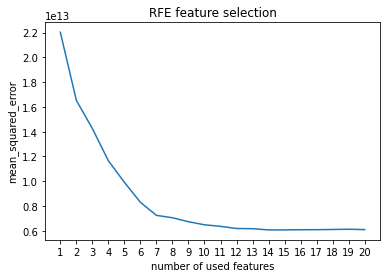

In [56]:
reg = GradientBoostingRegressor(random_state=12345)

rfecv1 = RFECV(
    estimator=reg,
    step=1,
    cv=kfold,
    scoring="neg_mean_squared_error",
    min_features_to_select=1,
    n_jobs=-1
)
rfecv1.fit(X, y)

plt.plot(range(1, 21), [-i for i in rfecv1.cv_results_['mean_test_score']])
plt.title('RFE feature selection')
plt.xticks(np.arange(1, 21, step=1))
plt.xlabel('number of used features')
plt.ylabel('mean_squared_error')
plt.show()

In [58]:
rfecv1.n_features_

14

Performing recursive feature elimination with cross validation using RFECV based on the Gradient Boosting Regressor. We can see the best performance comes from 16 features, as any more that that and the mean squared error starts to rise again.

In [66]:
score_1 = cross_val_score(GradientBoostingRegressor(), rfecv1.transform(X), y, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")

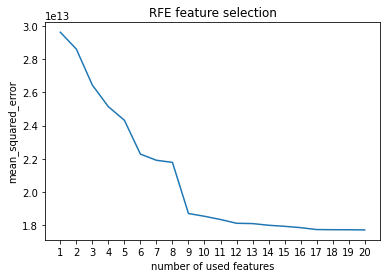

In [67]:
reg = LinearRegression()

rfecv2 = RFECV(
    estimator=reg,
    step=1,
    cv=kfold,
    scoring="neg_mean_squared_error",
    min_features_to_select=1,
    n_jobs=-1
)
rfecv2.fit(X, y)

plt.plot(range(1, 21), [-i for i in rfecv2.cv_results_['mean_test_score']])
plt.title('RFE feature selection')
plt.xticks(np.arange(1, 21, step=1))
plt.xlabel('number of used features')
plt.ylabel('mean_squared_error')
plt.show()

In [68]:
rfecv2.n_features_

20

For this one using Linear Regression, we can see that the best performance is at 20 features.

In [69]:
score_2 = cross_val_score(LinearRegression(), rfecv2.transform(X), y, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")

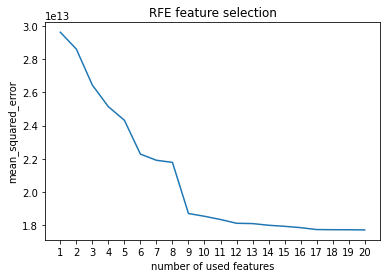

In [70]:
reg = Lasso()

rfecv3 = RFECV(
    estimator=reg,
    step=1,
    cv=kfold,
    scoring="neg_mean_squared_error",
    min_features_to_select=1,
    n_jobs=-1
)
rfecv3.fit(X, y)

plt.plot(range(1, 21), [-i for i in rfecv3.cv_results_['mean_test_score']])
plt.title('RFE feature selection')
plt.xticks(np.arange(1, 21, step=1))
plt.xlabel('number of used features')
plt.ylabel('mean_squared_error')
plt.show()

In [71]:
rfecv3.n_features_

20

For this one using Lasso, we can see that the best performance is at 20 features.

In [72]:
score_3 = cross_val_score(Lasso(), rfecv3.transform(X), y, cv=kfold, n_jobs=-1, scoring="neg_mean_squared_error")

In [73]:
print(f'GradientBoostingRegressor:\t {-score_1.mean()} \t+ {score_1.std()}')
print(f'LinearRegression:\t\t {-score_2.mean()} \t+ {score_2.std()}')
print(f'Lasso:\t\t\t\t {-score_3.mean()} \t+ {score_3.std()}')

GradientBoostingRegressor:	 6055153036048.94 	+ 1383844249987.9739
LinearRegression:		 17711965896305.32 	+ 2967590705334.4346
Lasso:				 17711965977082.074 	+ 2967599668707.7417


Score comparison. We can see that Gradient Boosting has the lowest mean of mean squared error by a factor of about 3, and also has the lowest standard deviation. Linear regression and Lasso are about equal, but Linear Regression is slightly better in mean and standard deviation of mean squared error, but not by nearly as much as Gradient Boosting.

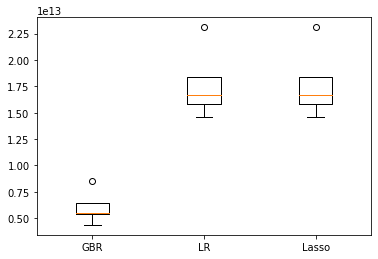

In [74]:
ax = plt.figure().add_subplot(111)
plt.boxplot([[-i for i in score_1], [-i for i in score_2], [-i for i in score_3]])
ax.set_xticklabels(['GBR', 'LR', 'Lasso'])
plt.show()

Creating a boxplot of the composite scores. Here, it is very clear how much better Gradient Boosting is than both of the other two options, which are so close as to be nearly indistinguishable.

Gradient Boosting appears to be so good because it is a nonlinear algorithm, unlike the other two. The fact that Gradient Boosting performs better than the linear algorithms is a clue that our data is nonlinear as well, because if it was linear, then the linear algorithms would have performed much better. In addition, Gradient Boosting is a ensemble algorithm, whereas Linear Regression and Lasso are simple base models, so it has more flexibility for data that doesn't perfectly fit a base model.

In [59]:
X = X[:, rfecv1.support_]

## MileStone 4: Tune the Model

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Reading X and y, and define the cross validation folds.

In [60]:
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)

X.shape, y.shape

((18207, 14), (18207,))

As the last two milestone reports showed, the best model for our project is Gradient Boosting Regressor.

After choosing Gradient Boosting Regressor, it is important to select which parameters are best served for our model. 
- loss: The loss function. Squared_error always gives a positive value and emphasizes the larger difference or effect of outliers on the overall performance. Huber, on the other hand, is less sensitive to outliers and is used in robust regression 
- learning_rate: Controls the change and impact of each tree on final outcome.
- n_estimators: The number of individual trees to be modeled, and higher numbers of trees can help GBM become more robust. It will need to be tuned using cross-validation at a particular value of learning rate. 
- max_depth: Maximum depth of the individual regression estimators. 

- subsample: The fraction of samples to be used for fitting the individual base learners.
- min_samples_split: The minimum number of samples required to split a non-leaf node
- min_sample_leaf: The minimum number of samples required to be at a leaf node
- max_features: Numbers of features to consider at each individual tree

We will tune the hyperparameters using GridSearchCV. CV will provide a more robust performance measure for each combination of hyperparameters. We split the param_grid searching into chunks so that it is easier to manage. Otherwise, it takes tens of hours to complete the search.

In [10]:
base_model = GradientBoostingRegressor(random_state=12345)

param_grid = {'loss': ['squared_error', 'huber'],
              'learning_rate': [0.001, 0.01, 0.1, 1],
              'n_estimators': range(80,261,40),
              'max_depth': range(3,7,1)}

RSCV = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kfold, verbose=10)
RSCV.fit(X, y)
RSCV.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'n_estimators': 240}

In [11]:
base_model = GradientBoostingRegressor(random_state=12345, 
                                       learning_rate=0.1,
                                       loss='squared_error',
                                       n_estimators=240,
                                       max_depth=5)
param_grid = {'subsample':  [0.5, 0.75, 1.0],
              'max_features': range(7,14,2),
              'min_samples_split': range(25,101,25),
              'min_samples_leaf': range(20,40,5)}
RSCV = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kfold, verbose=10)
RSCV.fit(X, y)
RSCV.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'max_features': 13,
 'min_samples_leaf': 20,
 'min_samples_split': 25,
 'subsample': 1.0}

Let's compare the performance between the base model and the fine-tuned model with 5-folds cross-validation using two metrics: mean squared error and r2 score.

- *'Before' means the performance of the base model.*

- *'After' means the performance of the fine-tuned model.*

## Boxplot of mean squared error before and after tuning hyperparameters.

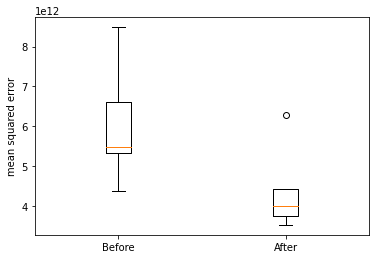

In [12]:
model = GradientBoostingRegressor(random_state=12345, 
                                  learning_rate=0.1,
                                  loss='squared_error',
                                  max_depth=5,
                                  n_estimators=240,
                                  max_features=13,
                                  min_samples_leaf=20,
                                  min_samples_split=25,
                                  subsample=1.0)
cv_scores_1 = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
model = GradientBoostingRegressor(random_state=12345)
cv_scores_2 = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)

ax = plt.figure().add_subplot(111)
plt.boxplot([[-i for i in cv_scores_2], [-i for i in cv_scores_1]])
ax.set_xticklabels(['Before', 'After'])
plt.ylabel('mean squared error')
plt.show()

In [13]:
print(f'Before:\t {-cv_scores_2.mean()} with std = {cv_scores_2.std()}')
print(f'After:\t {-cv_scores_1.mean()} with std = {cv_scores_1.std()}')

Before:	 6063768546646.604 with std = 1404944144717.408
After:	 4399891465323.725 with std = 984225798043.3031


We can see the model performs much better after tuning the hyperparameters, with much smaller mean sqaured error and smaller variance of the error.

## Boxplot of R squared score before and after tuning parameters.

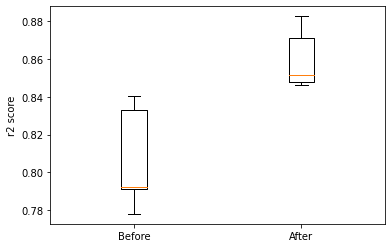

In [14]:
model = GradientBoostingRegressor(random_state=12345, 
                                  learning_rate=0.1,
                                  loss='squared_error',
                                  max_depth=5,
                                  n_estimators=240,
                                  max_features=13,
                                  min_samples_leaf=20,
                                  min_samples_split=25,
                                  subsample=1.0)
cv_scores_1 = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)
model = GradientBoostingRegressor(random_state=12345)
cv_scores_2 = cross_val_score(model, X, y, cv=kfold, scoring='r2', n_jobs=-1)

ax = plt.figure().add_subplot(111)
plt.boxplot([cv_scores_2, cv_scores_1])
ax.set_xticklabels(['Before', 'After'])
plt.ylabel('r2 score')
plt.show()

In [15]:
print(f'Before:\t {cv_scores_2.mean()} with std = {cv_scores_2.std()}')
print(f'After:\t {cv_scores_1.mean()} with std = {cv_scores_1.std()}')

Before:	 0.8070058809492249 with std = 0.02485891815311872
After:	 0.8598939706399216 with std = 0.014417427062726796


We can see the model performs much better after tuning the hyperparameters, with higher R sqaured score and smaller variance of the score.

# Conclusion
- MSE cross validation score: 
    - mean = 4399891465323.725 
    - std = 984225798043.3031
- R2 cross validation score: 
    - mean = 0.8598939706399216 
    - std = 0.014417427062726796

- Based on R2 score, the model performs well in the regression of values of FIFA players.
    - i.e. we can have an approximation on values of each player based on their historical data.
- Even though our data is from the FIFA video game, it is meant to be a simulation that is pretty close to realistic, especially when considering player statistics, so it is possible our results could matter to real-world players, but we were unable to find a similar dataset to test it on.
